In [6]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

'''...................... for 1 question.......................'''
# importing the necessary libraries:

import pandas as pd 
import requests


# Defining the ScriptData class:
   
class ScriptData:
   

# Initializing the class with an API key:
   def __init__(self,script):
       self.api_key=api_key

       
       
# Fetching the intraday data from the Alpha Vantage API:        
       
   def fetch_intraday_data(self, script):
       url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval=1min&apikey={}'.format(script,self)

       try:
           response = requests.get(url)
           data = response.json()
           self.data = data['Time Series (1min)']
       except requests.exceptions.RequestException as e:
           print('Error fetching data:', str(e))

           
           
# converting the intraday data to a pandas DataFrame:            
   def convert_intraday_data(self):
       df = pd.DataFrame.from_dict(self.data, orient='index', dtype=float)
       df.columns = ['open', 'high', 'low', 'close', 'volume']
       df.index = pd.to_datetime(df.index)
#         df = df.resample('1H').last().ffill()    its a extra thing for one hour gap
       return df

   def __getitem__(self, key):
       return getattr(self, key)

   def __setitem__(self, key, value):
       setattr(self, key, value)

   def __contains__(self, key):
       return hasattr(self, key)
   
# API key and executing the code:  

api_key = 'T3CPJ71CAKFIEYI6'
script = input()                   # Select any data as per as your choice Example for script: “GOOGL”, “AAPL”, “NVDA”)
data = ScriptData(api_key)
data.fetch_intraday_data(script)
df = data.convert_intraday_data()

print(df)


# In[ ]:






AAPL
                       open    high     low   close  volume
2023-06-15 19:59:00  185.74  185.74  185.73  185.73  1521.0
2023-06-15 19:58:00  185.74  185.74  185.74  185.74   415.0
2023-06-15 19:57:00  185.73  185.74  185.73  185.74   401.0
2023-06-15 19:56:00  185.75  185.76  185.72  185.72   670.0
2023-06-15 19:55:00  185.73  185.75  185.72  185.75  3394.0
...                     ...     ...     ...     ...     ...
2023-06-15 16:49:00  185.62  185.62  185.61  185.61   618.0
2023-06-15 16:48:00  185.61  185.64  185.61  185.64   459.0
2023-06-15 16:47:00  185.57  185.59  185.57  185.59  1183.0
2023-06-15 16:46:00  185.55  185.57  185.55  185.57   630.0
2023-06-15 16:45:00  185.65  185.65  185.61  185.61  1527.0

[100 rows x 5 columns]


In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[6]:
'''...........................for 2 question.................'''

# Same as First one but Add one function as per question choice

import pandas as pd
import requests


class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key

    def fetch_intraday_data(self, script):
        url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval=1min&apikey={}'.format(
            script, self.api_key)

        try:
            response = requests.get(url)
            data = response.json()
            self.data = data['Time Series (1min)']
        except requests.exceptions.RequestException as e:
            print('Error fetching data:', str(e))

    def convert_intraday_data(self):
        df = pd.DataFrame.from_dict(self.data, orient='index', dtype=float)
        df.columns = ['open', 'high', 'low', 'close', 'volume']
        df.index = pd.to_datetime(df.index)
        return df

    def __getitem__(self, key):
        return getattr(self, key)

    def __setitem__(self, key, value):
        setattr(self, key, value)

    def __contains__(self, key):
        return hasattr(self, key)

# take indicator1 function as per your choice or according to your qusetion

def indicator1(df, timeperiod):
    indicator_df = pd.DataFrame()

    if 'timestamp' in df.columns:
        indicator_df['timestamp'] = df['timestamp'].copy()

    if 'close' in df.columns:
        indicator_df['indicator'] = df['close'].rolling(window=timeperiod, min_periods=1).mean()

    return indicator_df


api_key = 'T3CPJ71CAKFIEYI6'
script = input()   # select from 'AAPL','GOOGL','MSFT', etcc as per your question choice 

data = ScriptData(api_key)
data.fetch_intraday_data(script)
df = data.convert_intraday_data()

# Calculate indicator using indicator1 function
timeperiod = 5
indicator_df = indicator1(df, timeperiod)

# Print the indicator DataFrame
print(indicator_df)



# In[ ]:






GOOGL
                     indicator
2023-06-15 19:58:00   124.8500
2023-06-15 19:57:00   124.8500
2023-06-15 19:47:00   124.8300
2023-06-15 19:46:00   124.8325
2023-06-15 19:45:00   124.8300
...                        ...
2023-06-15 15:45:00   125.2330
2023-06-15 15:44:00   125.2170
2023-06-15 15:43:00   125.2110
2023-06-15 15:42:00   125.2340
2023-06-15 15:41:00   125.2760

[100 rows x 1 columns]


               timestamp signal
4    2023-06-15 19:55:00   SELL
5    2023-06-15 19:54:00    BUY
6    2023-06-15 19:52:00    BUY
7    2023-06-15 19:50:00    BUY
8    2023-06-15 19:49:00    BUY
...                  ...    ...
7763 2023-06-02 04:06:00   SELL
7764 2023-06-02 04:05:00   SELL
7765 2023-06-02 04:04:00    BUY
7766 2023-06-02 04:03:00   SELL
7767 2023-06-02 04:01:00   SELL

[7706 rows x 2 columns]


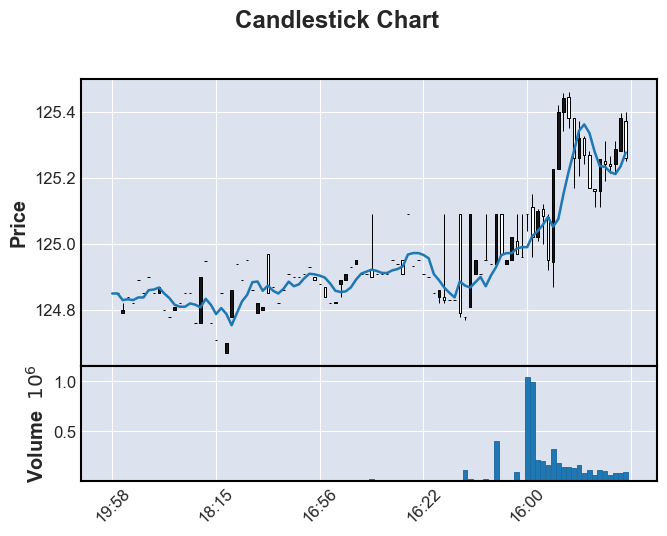

In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[29]:




# In[10]:
'''....................for 3rd question...............'''

import pandas as pd
import mplfinance as mpf
# from pyalgotrading.visual import plot_candlestick  '''this is not working so i have find the other from google'''
from alpha_vantage.timeseries import TimeSeries

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        
    def fetch_intraday_data(self, script):
        ts = TimeSeries(key=self.api_key, output_format='pandas')
        data, _ = ts.get_intraday(symbol=script, interval='1min', outputsize='full')
        return data
    
    def convert_intraday_data(self, script):
        intraday_data = self.fetch_intraday_data(script)
        intraday_data.reset_index(inplace=True)
        intraday_data.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
        intraday_data['timestamp'] = pd.to_datetime(intraday_data['timestamp'])
        return intraday_data


def indicator1(df, timeperiod):
    indicator_data = pd.DataFrame()
    indicator_data['timestamp'] = df['timestamp']
    indicator_data['indicator'] = df['close'].rolling(window=timeperiod).mean()
    return indicator_data


class Strategy:
    def __init__(self, script_name, api_key):
        self.script_name = script_name
        self.script_data = ScriptData(api_key)
    
    def fetch_intraday_historical_data(self):
        return self.script_data.convert_intraday_data(self.script_name)
    
    def indicator1(self, df, timeperiod):
        return indicator1(df, timeperiod)
    
    def generate_signals(self):
        df = self.fetch_intraday_historical_data()
        indicator_data = self.indicator1(df, timeperiod=5)
        
        signals = pd.DataFrame({'timestamp': df['timestamp']})
        signals['signal'] = 'NO_SIGNAL'
        
        signals.loc[indicator_data['indicator'] > df['close'], 'signal'] = 'BUY'
        signals.loc[indicator_data['indicator'] < df['close'], 'signal'] = 'SELL'
        
        return signals
    
    def print_signals(self):
        signals = self.generate_signals()
        filtered_signals = signals[signals['signal'].isin(['BUY', 'SELL'])]
        print(filtered_signals)


# In[14]:


api_key = 'T3CPJ71CAKFIEYI6'
script_name = 'AAPL'
strategy = Strategy(script_name, api_key)
strategy.print_signals()


# In[15]:


mpf.plot(df, type='candle', title='Candlestick Chart', ylabel='Price', volume=True, addplot=mpf.make_addplot(indicator_df))


# In[ ]:




